In [ ]:
from simulation import evaluate, interpolate
import numpy as np
from utils import *
import matplotlib.pyplot as plt
from xfoil import XFoil
from xfoil.model import Airfoil

af = np.loadtxt('baseline.dat')
af = interpolate(af, 256, 3)

cl = 0.65
xf = XFoil()
xf.print = 0
xf.airfoil = Airfoil(af[:,0], af[:,1])
xf.Re = 5.8e4
xf.M = 0
xf.max_iter = 2000
a, cd, cm, cp = xf.cl(cl)
perf = cl/cd
cdc = cd

af = setflap(af, theta=-2, pose = 0.7)
xf.airfoil = Airfoil(af[:,0], af[:,1])
xf.Re = 4e5
xf.M = 0
xf.max_iter = 2000
a, cl, cd, cm, cp = xf.aseq(-2, 2, 0.5)
i = cd.argmin()
perf, cd[i], a[i], cdc, cdc + cd[i] * 5

In [ ]:
perf_BL = perf
CD_BL = cd[i]

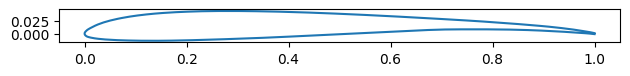

perf:  41.31892068281592 R:  0.041101685259491205


(0.041101685259491205,
 -1.0,
 0.65,
 41.31892068281592,
 0.015731291845440865,
 0.005074078682810068)

In [18]:
import numpy as np
from utils import *
points = 'results/_airfoilPPO.dat'
airfoil = np.loadtxt(points, skiprows=1)
show_airfoil(airfoil)
airfoil[:,1] = airfoil[:,1] * 0.06 / cal_thickness(airfoil)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, lamda=5, check_thickness=False)
name = points.split('/')[1].split('.')[0]+f'_{a}_{b}F'
np.savetxt(points.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")
R, a, b, perf, cd, CD_BL

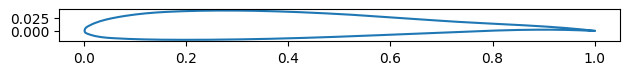

(False, 0.05709722185952662)

In [2]:
show_airfoil(af)
detect_intersect(af), cal_thickness(af)

In [21]:
points = 'results/_airfoilPPO.dat'
airfoil = np.loadtxt(points, skiprows=1)
print(cal_thickness(airfoil))
perf, _, cd = evalperf(airfoil, cl = 0.65, Re = 58000)
airfoil = setflap(airfoil, theta=-2)
CD, _ = evalpreset(airfoil, Re=4e5)
R = cd + CD * 5
print('Successful: CL/CD={:.4f}, R: {}, cd: {}, thickness: {}'.format(perf, R, CD, cal_thickness(airfoil)))

0.056303369434877064
Successful: CL/CD=41.5190, R: 0.041351703461259604, cd: 0.005139246117323637, thickness: 0.056245072403682074


In [ ]:
alphas = [-2,-1.5,-1,-0.5,0,0.5,1]
CDs = []
for alpha in alphas:
    xf = XFoil()
    xf.print=0
    xf.airfoil = Airfoil(af[:,0], af[:,1])
    xf.Re=4e5
    xf.max_iter=2000
    _, CD, _, _ = xf.a(alpha)
    CDs.append(CD)
    del xf
CDs

In [ ]:
np.linspace(-1,1,5)

In [ ]:
import numpy as np
from utils import *

def evalpreseta(airfoil, Re = 4e5):
    xf = XFoil()
    xf.print = 0
    xf.airfoil = Airfoil(airfoil[:,0], airfoil[:,1])
    xf.Re = Re
    # xf.M = 0.11
    xf.max_iter = 300
    a, CL, CD, cm, cp = xf.aseq(-2, 2, 0.5)
    i_nan = np.argwhere(np.isnan(CD))
    a = np.delete(a, i_nan)
    CD = np.delete(CD, i_nan)
    try:
        i_min = CD.argmin()
        CD = CD[i_min]
        a = a[i_min]
    except:
        CD = np.nan
    return CD, a
# points = 'BETTER/airfoil001.dat'
# airfoil = np.loadtxt(points, skiprows=1)
airfoils = np.load('/work3/s212645/BezierGANPytorch/Airfoils/003.npy')
airfoils = delete_intersect(airfoils)
airfoil = airfoils[33, :, :]
airfoil = derotate(airfoil)
airfoil = Normalize(airfoil)
xhat, yhat = savgol_filter((airfoil[:,0], airfoil[:,1]), 10, 3)
airfoil[:,0] = xhat
airfoil[:,1] = yhat
airfoil = setupflap(airfoil, theta=-2)
# CD, aa = evalpreseta(airfoil)

xf = XFoil()
xf.print = 0
xf.airfoil = Airfoil(airfoil[:,0], airfoil[:,1])
xf.Re = 4e5
xf.max_iter = 200
a = np.linspace(-2,2,5)
CD = []
for alfa in a:
    _, cd, _, _ = xf.a(alfa)
    CD.append(cd)
i_nan = np.argwhere(np.isnan(CD))
cds = CD
a = np.delete(a, i_nan)
CD = np.delete(CD, i_nan)
try:
    i_min = CD.argmin()
    CD = CD[i_min]
    a = a[i_min]
except:
    CD = np.nan
        
af = setflap(airfoil, theta=2)
perf, _, cd = evalperf(af)
np.savetxt('BETTER/airfoil001.dat', airfoil, header='airfoil001', comments="")
CD, cd, perf, cd + CD * 3, a, cds

In [ ]:
import numpy as np
from utils import *
points = 'samples/airfoil008.dat'
airfoil = np.loadtxt(points, skiprows=1)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil)
name = points.split('/')[1].split('.')[0]+f'_{a}_{b}F'
np.savetxt(points.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")

R, a, b, perf, cd, CD_BL